In [1]:
%matplotlib inline

4.0


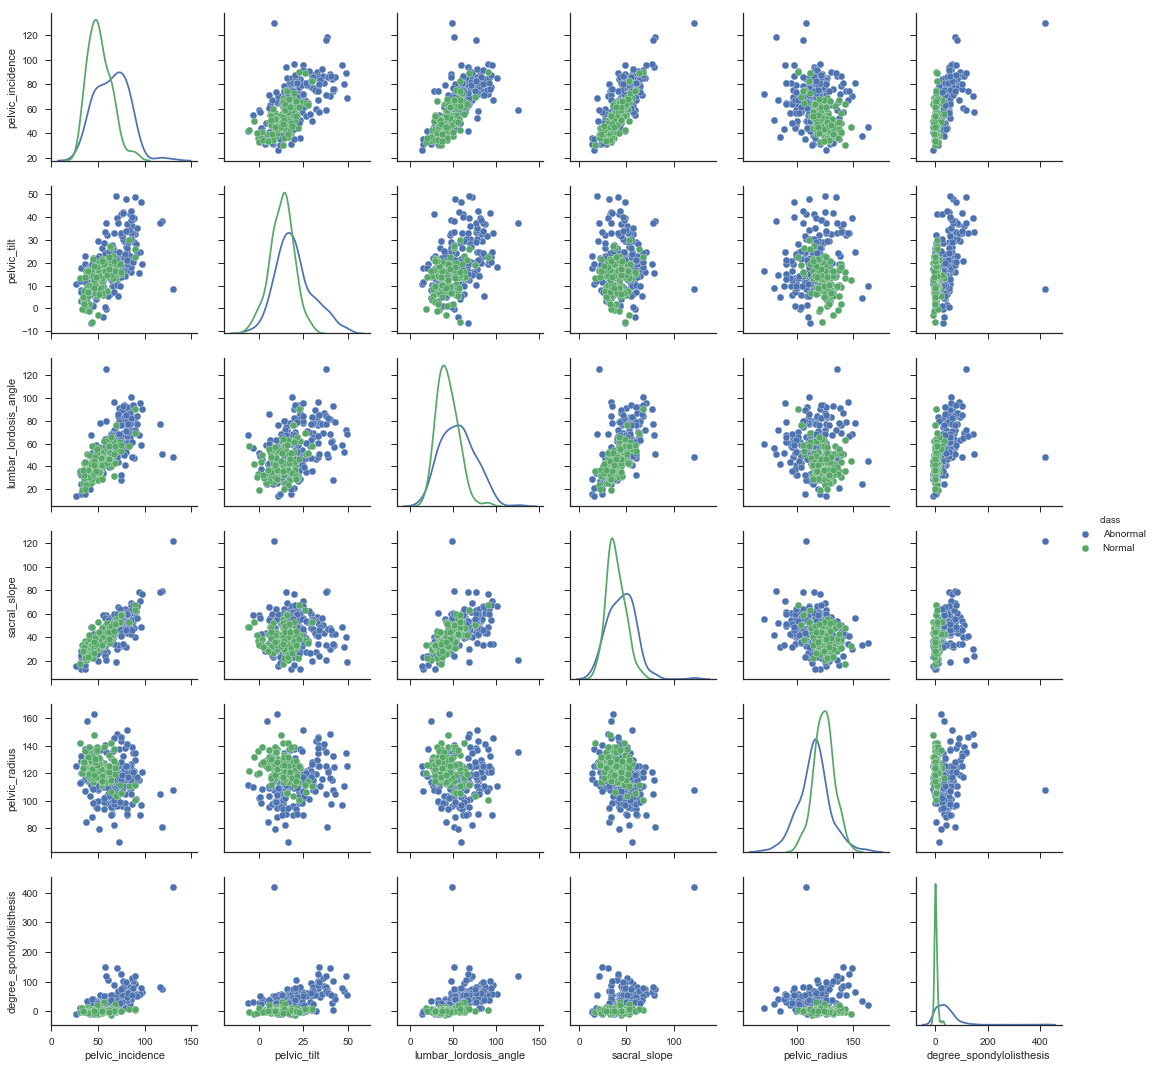

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import *
from sklearn.neighbors import *
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.metrics import confusion_matrix

sns.set(style="ticks", color_codes=True)

dataSet_path = "/Users/martingeng/Downloads/csv_result-column_2C_weka.csv"
dataSet = pd.read_csv(dataSet_path)
graph = sns.pairplot(dataSet.drop('id', axis = 1), hue = 'class', diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23dc3390>,
      dtype=object)

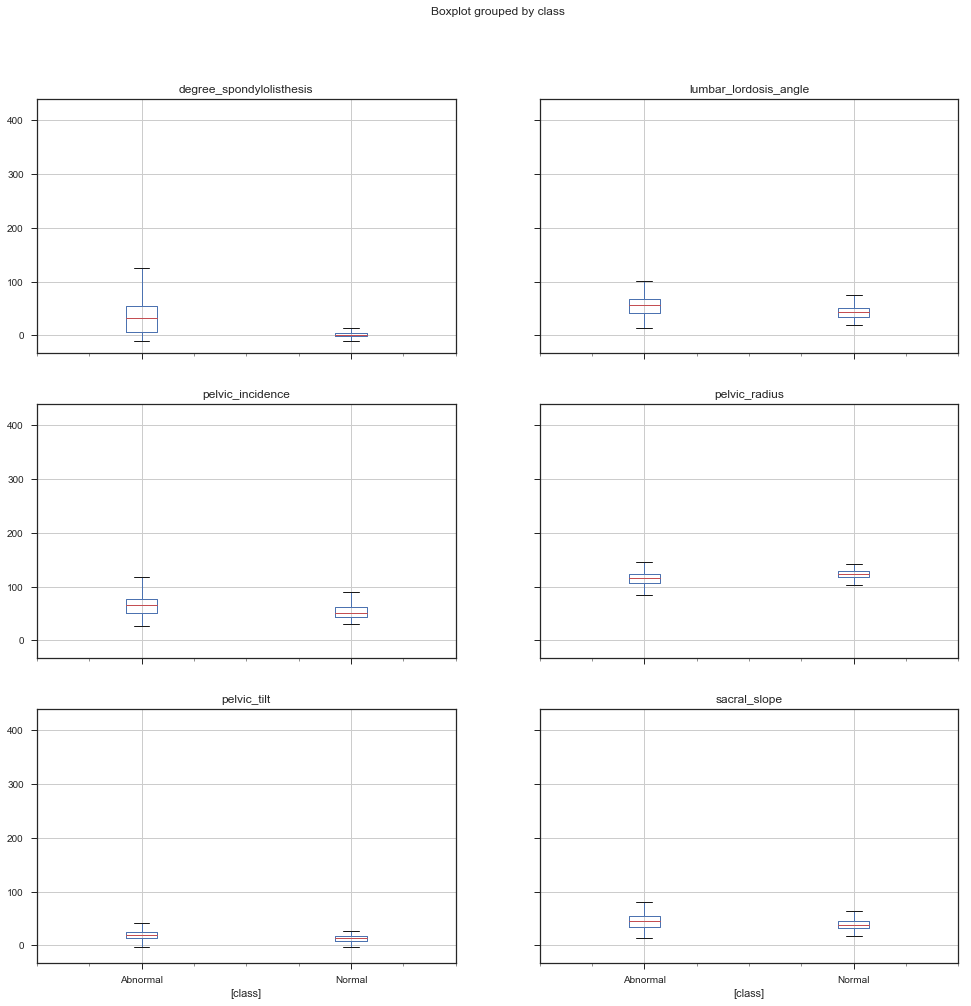

In [3]:
dataSet.drop("id", axis=1).boxplot(by="class", figsize=(16, 16))

In [6]:
np.seterr(invalid='ignore')

dataSet_path = "/Users/martingeng/Downloads/csv_result-column_2C_weka.csv"
dataSet = pd.read_csv(dataSet_path)

ab_dataSet = dataSet[dataSet['class'].isin(['Abnormal'])]
no_dataSet = dataSet[dataSet['class'].isin(['Normal'])]

# 选取normal/abnormal中作为测试集的部分
ab_dataSet_training = ab_dataSet.iloc[0:140, :]
no_dataSet_training = no_dataSet.iloc[0:70, :]

ab_dataSet_test = ab_dataSet.iloc[140:, :]
no_dataSet_test = no_dataSet.iloc[70:, :]

# 拼接后得到训练集与测试集
dataSet_test = pd.concat([ab_dataSet_test, no_dataSet_test])
dataSet_training = pd.concat([ab_dataSet_training, no_dataSet_training])

# 将abel从数据中单独保存为一个列表
dataSet_test_label = dataSet_test['class'].tolist()
dataSet_training_label = dataSet_training['class'].tolist()

del dataSet_test['class']
del dataSet_training['class']
del dataSet_test['id']
del dataSet_training['id']

def label2number(label_list):
    number_label_list = []
    for label in label_list:
        if label == 'Abnormal':
            number_label_list.append(1)
        else:
            number_label_list.append(0)
    return number_label_list

training_label = label2number(dataSet_training_label)
test_label = label2number(dataSet_test_label)

In [38]:
def count_error(prediction_label_list, dataSet_test_label):
    n = len(prediction_label_list)
    fit = float(0)
    if n != len(dataSet_test_label):
        print('something\'s wrong')
    else:
        for i in list(range(1,n)):
            if prediction_label_list[i] == dataSet_test_label[i]:
                fit += 1
        return float(1 - (fit/float(n)))

In [166]:
error_rate_list = []
best_training_error_error_list = []
k_values = list(range(1, 208, 2))
k_values.reverse()

for k in k_values:
    neigh = kNN(n_neighbors=k, algorithm='brute', weights='uniform', metric='minkowski', 
                metric_params= {'p': 2} ,n_jobs=1)
    neigh.fit(dataSet_training, training_label)
    predict_label = neigh.predict(dataSet_test)
    error_rate = count_error(predict_label, test_label)
    error_rate_list.append(error_rate)


#print(min(error_rate_list), k_values[error_rate_list.index(min(error_rate_list))])

print('\tthe most suitable k* is', k_values[error_rate_list.index(min(error_rate_list))])

training_error_rate_list = []
for k in k_values:
    neigh = kNN(n_neighbors=k, algorithm='brute', weights='uniform', metric='minkowski',
                metric_params= {'p': 2} ,n_jobs=1)
    neigh.fit(dataSet_training, training_label)
    training_predict_label = neigh.predict(dataSet_training)
    training_error_rate = count_error(training_predict_label, training_label)
    training_error_rate_list.append(training_error_rate)


#print(min(training_error_rate_list), k_values[training_error_rate_list.index(min(training_error_rate_list))])


/Users/martingeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  import sys
/Users/martingeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.


	the most suitable k* is 3
0.004761904761904745 1


						test error plot


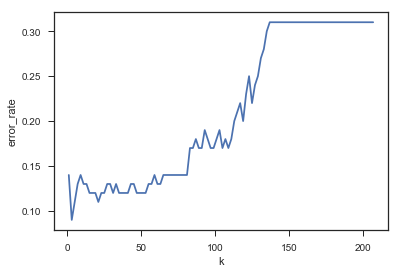

In [169]:
plot_list = []
for i in list(range(len(k_values))):
    plot_list.append([k_values[i], error_rate_list[i]])

plt.plot(k_values, error_rate_list)
plt.xlabel('k')
plt.ylabel('error_rate')
print('\t\t\t\t\t\ttest error plot')
plt.show()

					train_error_rate_Plot


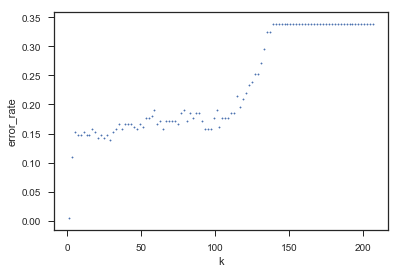

In [168]:
plot_list = []
for i in list(range(len(k_values))):
    plot_list.append([k_values[i], training_error_rate_list[i]])

plt.scatter(k_values, training_error_rate_list, s = 2)
plt.xlabel('k')
plt.ylabel('error_rate')
print('\t\t\t\t\ttrain_error_rate_Plot')
plt.show()

In [162]:
from sklearn.metrics import *
neigh = kNN(n_neighbors=3, algorithm='brute', weights='uniform', metric='minkowski', 
                metric_params= {'p': 2} ,n_jobs=1)
neigh.fit(dataSet_training, training_label)
predict_label = neigh.predict(dataSet_test)
error_rate = count_error(predict_label, test_label)

confusionMetrix = confusion_matrix(test_label, predict_label)
#in confusion_metrix, |[0][0]TN,[0][1]FP|
#                             |[1][0]FN,[1][1]TP|
print(confusionMetrix)
#TPR = TP/(TP+FN)
#TNR = TN?(TN+FP)
true_positive_rate = confusionMetrix[1][1]/(confusionMetrix[1][1]+confusionMetrix[1][0])
true_negative_rate = confusionMetrix[0][0]/(confusionMetrix[0][0]+confusionMetrix[0][1])
precision = precision_score(test_label, predict_label)
F1_score = f1_score(test_label, predict_label)
print('\ttrue positive rate is ', true_positive_rate,'\n\tthe true negative rate is',  true_negative_rate)
print('\tprecision is ', precision,'\n\tthe f1-score is',  F1_score)

[[23  7]
 [ 1 69]]
	true positive rate is  0.9857142857142858 
	the true negative rate is 0.7666666666666667
	precision is  0.9078947368421053 
	the f1-score is 0.9452054794520548


/Users/martingeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


In [134]:
def trim_data(trainingData, N):
    no_end = 140 + int(N/3)
    ab_end = N - int(N/3)
    ab_part = trainingData.iloc[0:ab_end,:]
    no_part = trainingData.iloc[140:no_end,:]
    trimmed_trainingData = pd.concat([ab_part, no_part])
    #print('\t',len(ab_part),'\t',len(no_part))
    #print(len(trimmed_trainingData))
    return trimmed_trainingData

In [116]:
def trim_label(N):
    trimmed_label = [1]*int(N/3) + [0]*(N-int(N/3))
    return trimmed_label

/Users/martingeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  del sys.path[0]


				Learning Curve


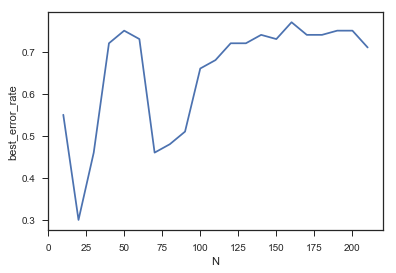

In [161]:
N_list = list(range(10,211,10))
k_list = list(range(1,197,5))
best_error_rate_list = []

for N in N_list:
    
    trimmed_trainingData = trim_data(dataSet_training, N)
    trimmed_trainingLabel = trim_label(N)
    error_rate_list = []
    
    for k in k_list:
        neigh = kNN(n_neighbors=3, algorithm='brute', weights='uniform', metric='minkowski', 
                metric_params= {'p': 2} ,n_jobs=1)
        neigh.fit(trimmed_trainingData, trimmed_trainingLabel)
        predict_label = neigh.predict(dataSet_test)
        error_rate = count_error(predict_label, test_label)
        error_rate_list.append(error_rate)
        
    optimal_k = k_list[error_rate_list.index(min(error_rate_list))]
    best_error_rate = min(error_rate_list)
#     print(min(error_rate_list))
#     print(optimal_k)
    best_error_rate_list.append(best_error_rate)

    
plt.plot(N_list, best_error_rate_list)
plt.xlabel('N')
plt.ylabel('best_error_rate')
print('\t\t\t\tLearning Curve')
plt.show()

        
    

In [178]:
error_rate_list = []
k_values = list(range(1, 197, 5))

for k in k_values:
    neigh = kNN(n_neighbors=k, algorithm='brute', weights='uniform', metric='minkowski', 
                metric_params= {'p': 1} ,n_jobs=1)
    neigh.fit(dataSet_training, training_label)
    predict_label = neigh.predict(dataSet_test)
    error_rate = count_error(predict_label, test_label)
    error_rate_list.append(error_rate)


print('\tthe best error rate is:', min(error_rate_list), 'when k =', k_values[error_rate_list.index(min(error_rate_list))])


training_error_rate_list = []
for k in k_values:
    neigh = kNN(n_neighbors=k, algorithm='brute', weights='uniform', metric='minkowski',
                metric_params= {'p': 1} ,n_jobs=1)
    neigh.fit(dataSet_training, training_label)
    training_predict_label = neigh.predict(dataSet_training)
    training_error_rate = count_error(training_predict_label, training_label)
    training_error_rate_list.append(training_error_rate)
print('\tthe best training error rate is:', min(training_error_rate_list),
      'when k =', k_values[training_error_rate_list.index(min(training_error_rate_list))])

	the best error rate is: 0.12 when k = 1
	the best training error rate is: 0.004761904761904745 when k = 1


/Users/martingeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  
/Users/martingeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.


In [179]:
p_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
p_values = []
error_rate_list = []
for p in p_list:
    p_values.append(np.power(10, p))
#print(p_values)
    
for p in p_values:
    neigh = kNN(n_neighbors=26, algorithm='brute', weights='uniform', metric='minkowski', 
                metric_params= {'p': p} ,n_jobs=1)
    neigh.fit(dataSet_training, training_label)
    predict_label = neigh.predict(dataSet_test)
    error_rate = count_error(predict_label, test_label)
    error_rate_list.append(error_rate)

print('\tthe best error rate is:', min(error_rate_list), 'when log10(p) =', p_list[error_rate_list.index(min(error_rate_list))])
#print('\terror_list is:',error_rate_list)

training_error_rate_list = []
for p in p_values:
    neigh = kNN(n_neighbors=k, algorithm='brute', weights='uniform', metric='minkowski',
                metric_params= {'p': 2} ,n_jobs=1)
    neigh.fit(dataSet_training, training_label)
    training_predict_label = neigh.predict(dataSet_training)
    training_error_rate = count_error(training_predict_label, training_label)
    training_error_rate_list.append(training_error_rate)
print('\tthe best training error rate is:', min(training_error_rate_list), 
      'when p =', p_values[training_error_rate_list.index(min(training_error_rate_list))])

	the best error rate is: 0.10999999999999999 when log10(p) = 0.1
	the best training error rate is: 0.3380952380952381 when p = 1.2589254117941673


/Users/martingeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  # Remove the CWD from sys.path while we load stuff.
/Users/martingeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.


In [180]:
error_rate_list = []
k_values = list(range(1, 197, 5))

for k in k_values:
    neigh = kNN(n_neighbors=k, algorithm='brute', weights='uniform', metric='minkowski', 
                metric_params= {'p': float('inf')} ,n_jobs=1)
    neigh.fit(dataSet_training, training_label)
    predict_label = neigh.predict(dataSet_test)
    error_rate = count_error(predict_label, test_label)
    error_rate_list.append(error_rate)


print('\tthe best error rate is:', min(error_rate_list), 'when k =', k_values[error_rate_list.index(min(error_rate_list))])

training_error_rate_list = []
for k in k_values:
    neigh = kNN(n_neighbors=k, algorithm='brute', weights='uniform', metric='minkowski',
                metric_params= {'p': float('inf')} ,n_jobs=1)
    neigh.fit(dataSet_training, training_label)
    training_predict_label = neigh.predict(dataSet_training)
    training_error_rate = count_error(training_predict_label, training_label)
    training_error_rate_list.append(training_error_rate)
print('\tthe best training error rate is:', min(training_error_rate_list),
      'when k =', k_values[training_error_rate_list.index(min(training_error_rate_list))])

	the best error rate is: 0.08999999999999997 when k = 16
	the best training error rate is: 0.004761904761904745 when k = 1


/Users/martingeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  
/Users/martingeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.


In [182]:
error_rate_list = []

for k in list(range(1,197,5)):
    neigh = kNN(n_neighbors=k, algorithm='brute', weights='uniform', metric='mahalanobis', 
                metric_params= {'VI': np.linalg.inv(np.cov(dataSet_training))} ,n_jobs=1)
    neigh.fit(dataSet_training, training_label)
    predict_label = neigh.predict(dataSet_test)
    error_rate = count_error(predict_label, test_label)
    error_rate_list.append(error_rate)
    
print('\tthe best error rate is:', min(error_rate_list), 'when k =', k_values[error_rate_list.index(min(error_rate_list))])


training_error_rate_list = []
for k in k_values:
    neigh = kNN(n_neighbors=k, algorithm='brute', weights='uniform', metric='mahalanobis',
                metric_params= {'VI': np.linalg.inv(np.cov(dataSet_training))} ,n_jobs=1)
    neigh.fit(dataSet_training, training_label)
    training_predict_label = neigh.predict(dataSet_training)
    training_error_rate = count_error(training_predict_label, training_label)
    training_error_rate_list.append(training_error_rate)
print('\tthe best training error rate is:', min(training_error_rate_list), 'when k =', 
      k_values[training_error_rate_list.index(min(training_error_rate_list))])


	the best error rate is: 0.09999999999999998 when k = 41
	the best training error rate is: 0.004761904761904745 when k = 1


In [186]:
error_rate_list = []
k_values = list(range(1, 197, 5))

for k in k_values:
    neigh = kNN(n_neighbors=k, algorithm='brute', weights='distance', metric='minkowski', 
                metric_params= {'p': 1} ,n_jobs=1)
    neigh.fit(dataSet_training, training_label)
    predict_label = neigh.predict(dataSet_test)
    error_rate = count_error(predict_label, test_label)
    error_rate_list.append(error_rate)


print('\tuse weighted decision, in Euclidean metric, \n\tthe best error rate is:', 
      min(error_rate_list), 'when k =', k_values[error_rate_list.index(min(error_rate_list))])

training_error_rate_list = []
for k in k_values:
    neigh = kNN(n_neighbors=k, algorithm='brute', weights='uniform', metric='minkowski',
                metric_params= {'p': 1} ,n_jobs=1)
    neigh.fit(dataSet_training, training_label)
    training_predict_label = neigh.predict(dataSet_training)
    training_error_rate = count_error(training_predict_label, training_label)
    training_error_rate_list.append(training_error_rate)
print('\tthe best training error rate is:', min(training_error_rate_list), 'when k =',
      k_values[training_error_rate_list.index(min(training_error_rate_list))])

	use weighted decision, in Euclidean metric, 
	the best error rate is: 0.10999999999999999 when k = 26
	the best training error rate is: 0.004761904761904745 when k = 1


/Users/martingeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  
/Users/martingeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.


In [185]:
error_rate_list = []
k_values = list(range(1, 197, 5))

for k in k_values:
    neigh = kNN(n_neighbors=k, algorithm='brute', weights='distance', metric='minkowski', 
                metric_params= {'p': 2} ,n_jobs=1)
    neigh.fit(dataSet_training, training_label)
    predict_label = neigh.predict(dataSet_test)
    error_rate = count_error(predict_label, test_label)
    error_rate_list.append(error_rate)


print('\tuse weighted decision, in Manhattan metric, \n\tthe best error rate is:', min(error_rate_list), 
      'when k =', k_values[error_rate_list.index(min(error_rate_list))])

training_error_rate_list = []
for k in k_values:
    neigh = kNN(n_neighbors=k, algorithm='brute', weights='uniform', metric='minkowski',
                metric_params= {'p': 2} ,n_jobs=1)
    neigh.fit(dataSet_training, training_label)
    training_predict_label = neigh.predict(dataSet_training)
    training_error_rate = count_error(training_predict_label, training_label)
    training_error_rate_list.append(training_error_rate)
print('\tthe best training error rate is:', min(training_error_rate_list), 'when k =',
      k_values[training_error_rate_list.index(min(training_error_rate_list))])

	use weighted decision, in Manhattan metric, 
	the best error rate is: 0.10999999999999999 when k = 6
	the best training error rate is: 0.004761904761904745 when k = 1


/Users/martingeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  
/Users/martingeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.


In [187]:
error_rate_list = []
k_values = list(range(1, 197, 5))

for k in k_values:
    neigh = kNN(n_neighbors=k, algorithm='brute', weights='distance', metric='minkowski', 
                metric_params= {'p': float('inf')} ,n_jobs=1)
    neigh.fit(dataSet_training, training_label)
    predict_label = neigh.predict(dataSet_test)
    error_rate = count_error(predict_label, test_label)
    error_rate_list.append(error_rate)


print('\tuse weighted decision, in Chebyshev metric, \n\tthe best error rate is:', 
      min(error_rate_list), 'when k =', k_values[error_rate_list.index(min(error_rate_list))])

training_error_rate_list = []
for k in k_values:
    neigh = kNN(n_neighbors=k, algorithm='brute', weights='uniform', metric='minkowski',
                metric_params= {'p': float('inf')} ,n_jobs=1)
    neigh.fit(dataSet_training, training_label)
    training_predict_label = neigh.predict(dataSet_training)
    training_error_rate = count_error(training_predict_label, training_label)
    training_error_rate_list.append(training_error_rate)
print('\tthe best training error rate is:', min(training_error_rate_list), 'when k =',
      k_values[training_error_rate_list.index(min(training_error_rate_list))])

	use weighted decision, in Chebyshev metric, 
	the best error rate is: 0.12 when k = 16
	the best training error rate is: 0.004761904761904745 when k = 1


/Users/martingeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  
/Users/martingeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.


In [188]:
print('\tthe lowest training error rate is ',0.004761904761904745 )

	the lowest training error rate is  0.004761904761904745
